In [1]:
import xarray as xr
import rioxarray
import matplotlib.pyplot as plt
import geopandas as gpd
import cartopy.crs as ccrs

/tmp/ipykernel_20689/3596488845.py:4: DeprecationWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas still uses PyGEOS by default. However, starting with version 0.14, the default will switch to Shapely. To force to use Shapely 2.0 now, you can either uninstall PyGEOS or set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In the next release, GeoPandas will switch to using Shapely by default, even if PyGEOS is installed. If you only have PyGEOS installed to get speed-ups, this switch should be smooth. However, if you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd


In [2]:
# Load netCDF
ds = xr.open_dataset('/home/mark/projects/open-gira/results/direct/WP/max_wind_field_WP_1.nc')
ds

<xarray.Dataset>
Dimensions:         (event_id: 100, latitude: 700, longitude: 850)
Coordinates:
  * event_id        (event_id) object 'WP_0_0_1' 'WP_0_0_14' ... 'WP_0_107_12'
  * latitude        (latitude) float64 64.95 64.85 64.75 ... -4.75 -4.85 -4.95
  * longitude       (longitude) float64 95.05 95.15 95.25 ... 179.8 179.9 179.9
Data variables:
    spatial_ref     int64 ...
    max_wind_speed  (event_id, latitude, longitude) float64 ...

In [3]:
# Choose specific event_id
event_id = "WP_0_101_4"

/tmp/ipykernel_20689/3484057874.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gdf = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


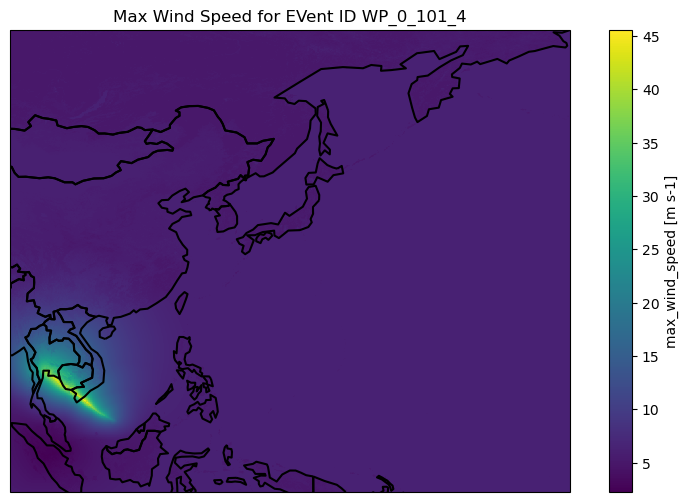

In [4]:
# View event
event_data = ds.sel(event_id=event_id)
da = event_data['max_wind_speed']

# Plot figure
gdf = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
plt.figure(figsize=(10, 6))
lat_min, lat_max = da.latitude.min(), da.latitude.max()
lon_min, lon_max = da.longitude.min(), da.longitude.max()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())
da.plot(ax=ax, cmap='viridis', transform=ccrs.PlateCarree())
gdf.boundary.plot(ax=ax, colors='k')
plt.title(f'Max Wind Speed for EVent ID {event_id}')
plt.show()

In [5]:
# Export to GeoTiff
da.rio.write_crs('EPSG:4326', inplace=True)
da = da.rio.set_spatial_dims(x_dim='longitude', y_dim='latitude', inplace=True)
output_file = '/home/mark/projects/open-gira/results/direct/WP/inspect/%s.tif' % event_id
da.rio.to_raster(output_file)